In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
import random

In [9]:
class AgentState(TypedDict):
    name: str
    numbers: list[int]
    counter: int

In [10]:
def greeting_node(state: AgentState) -> AgentState:
    """Says hi to the person"""
    state["name"] = f"Hi there, {state["name"]}"
    state["counter"] = 0 

    return state

def randomize_number_node(state: AgentState) -> AgentState:
    '''Generate random number'''
    state['numbers'].append(random.randint(0,10))
    state['counter'] += 1
    return state

def should_continue(state: AgentState) -> str:
    '''Decide whether to loop'''
    if state['counter'] < 5:
        print('looping', state['counter'])
        return 'loop'
    return 'stop'

In [11]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", randomize_number_node)

graph.add_edge("greeting", "random")
graph.add_edge(START, "greeting")
graph.add_conditional_edges(
    "random", 
    should_continue,
    {
        "loop": "random",
        "stop": END
    }
)
app = graph.compile()

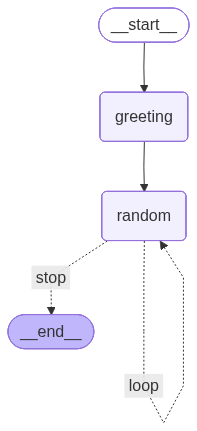

In [12]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
input = AgentState(
    name = "Andrew",
    numbers = [],
    counter = 0
)
app.invoke(input)

looping 1
looping 2
looping 3
looping 4


{'name': 'Hi there, Andrew', 'numbers': [1, 7, 1, 9, 5], 'counter': 5}